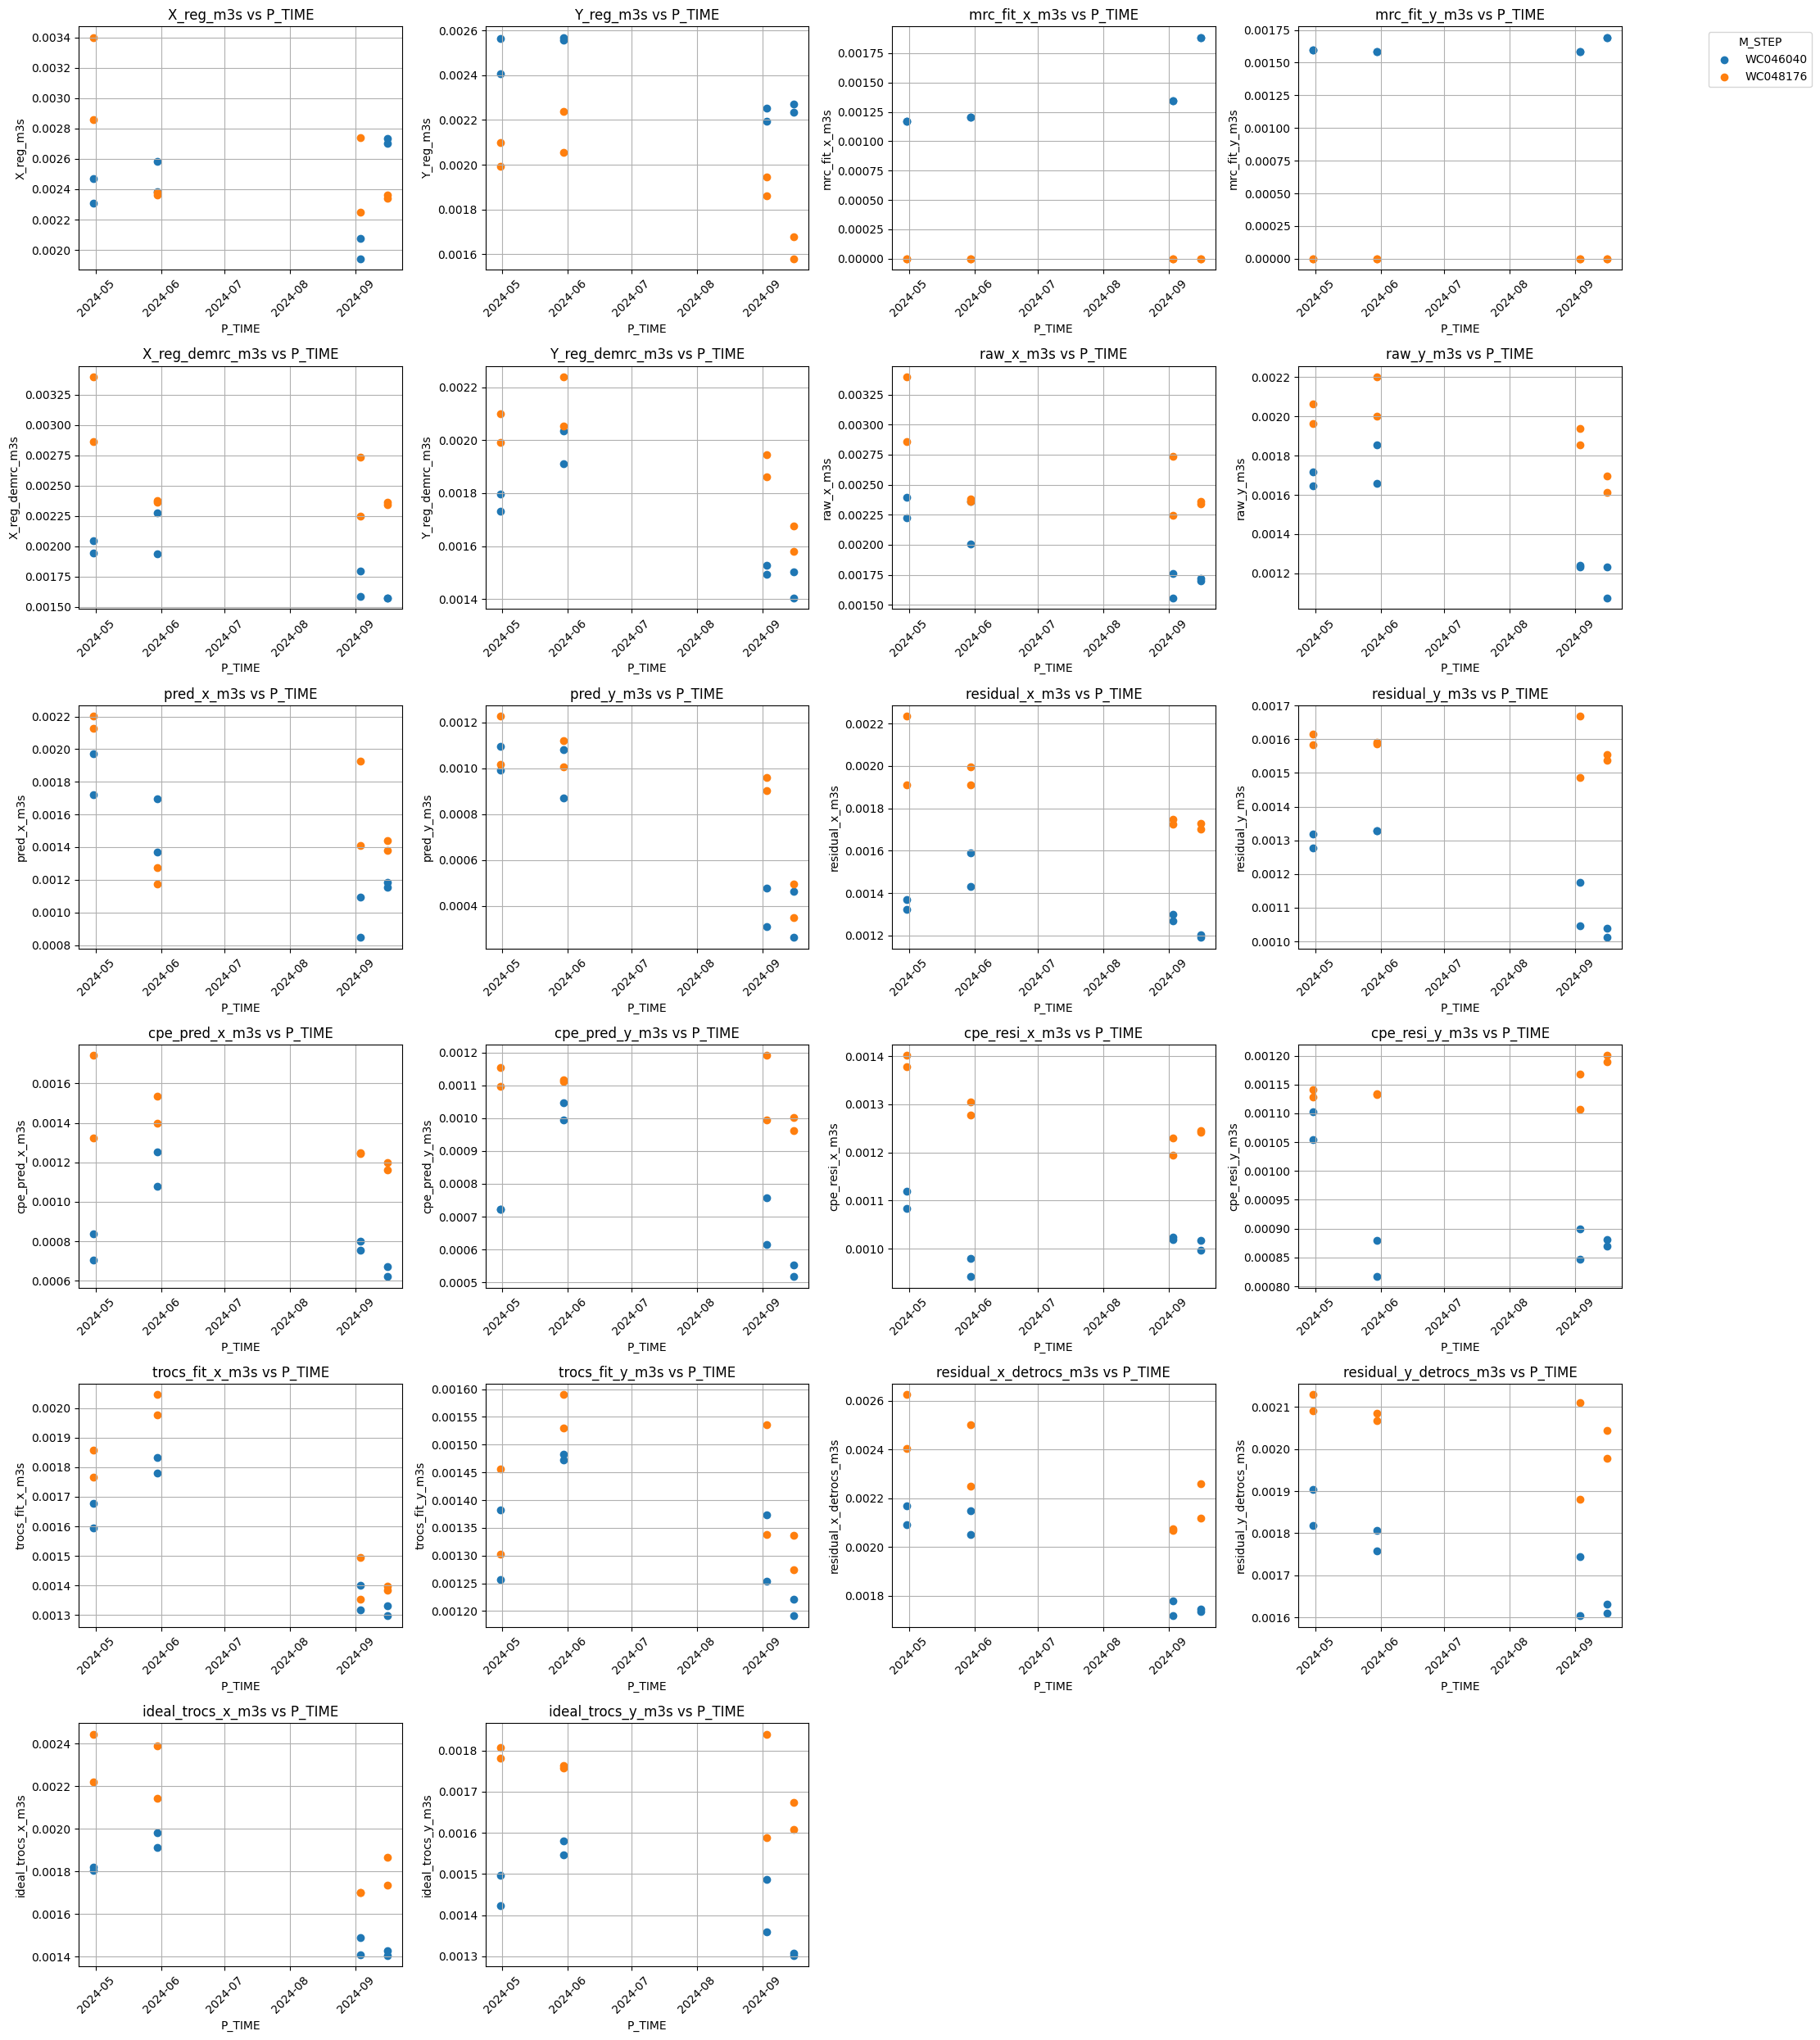

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 데이터 준비
file_path = 'output_m3s.xlsx'
excel_data = pd.read_excel(file_path)

# 'P_TIME'을 시간 형식으로 변환
excel_data['P_TIME'] = pd.to_datetime(excel_data['P_TIME'])

# 고유한 색상을 사용할 수 있도록 M_STEP별 색상 정의
unique_steps = excel_data['M_STEP'].unique()
colors_list = list(mcolors.TABLEAU_COLORS.values())  # 선명한 색상 사용
step_color_map = {step: colors_list[idx % len(colors_list)] for idx, step in enumerate(unique_steps)}

# 새로운 y축 열 목록
new_y_columns = [
    'X_reg_m3s', 'Y_reg_m3s', 'mrc_fit_x_m3s', 'mrc_fit_y_m3s', 'X_reg_demrc_m3s', 'Y_reg_demrc_m3s',
    'raw_x_m3s', 'raw_y_m3s', 'pred_x_m3s', 'pred_y_m3s', 'residual_x_m3s', 'residual_y_m3s', 'cpe_pred_x_m3s', 'cpe_pred_y_m3s',
    'cpe_resi_x_m3s', 'cpe_resi_y_m3s', 'trocs_fit_x_m3s', 'trocs_fit_y_m3s',
    'residual_x_detrocs_m3s', 'residual_y_detrocs_m3s', 'ideal_trocs_x_m3s', 'ideal_trocs_y_m3s'
]


# Scatter plot 그리기 (6행 4열로 배열)
plt.figure(figsize=(20, 25))

for idx, y_column in enumerate(new_y_columns, 1):
    plt.subplot(6, 4, idx)
    for step in unique_steps:
        step_data = excel_data[excel_data['M_STEP'] == step]
        plt.scatter(step_data['P_TIME'], step_data[y_column], label=step, color=step_color_map[step])
    
    plt.title(f'{y_column} vs P_TIME')
    plt.xlabel('P_TIME')
    plt.ylabel(y_column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

# 범례를 첫 번째 행의 가장 오른쪽에 위치
plt.subplot(6, 4, 4)
plt.legend(title='M_STEP', bbox_to_anchor=(1.25, 1), loc='upper left')

plt.show()

